# For plotting of accuracy and loss for all validation files in a folder
Used for testing purposes

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as mt
import numpy as np

In [9]:
target_dir = "/home/vincent/Documenten/BachelorsProject/ft_prelim3/"

In [10]:
# Get the validation and testing data:
validation = dict()
test = dict()

for file in os.scandir(target_dir):
    if file.is_file() and "-validation.csv" in file.name:
        validation[file.name[:file.name.find("-validation.csv")]] = pd.read_csv(file.path)
    elif file.is_file() and "-test_predictions.csv" in file.name:
        test[file.name[:file.name.find("-test_predictions.csv")]] = file.path

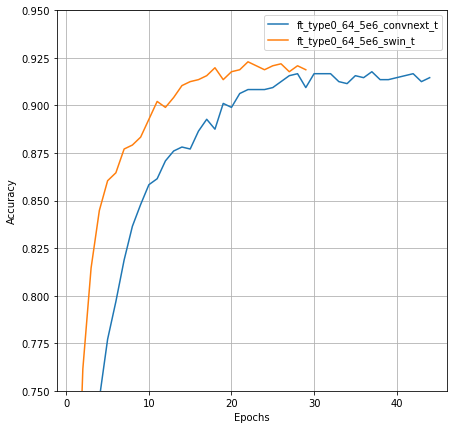

In [16]:
# Plotting accuracy:
for model in validation:
    if "5e6" not in model:
        continue
    df = validation[model]
    x = [idx + 1 for idx in range(len(df))]
    y = df["accuracy"].to_list()
    plt.plot(x, y, label=model)

plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim(top=0.95, bottom=0.75)

fig = plt.gcf()
fig.set_size_inches(7, 7)
plt.show()

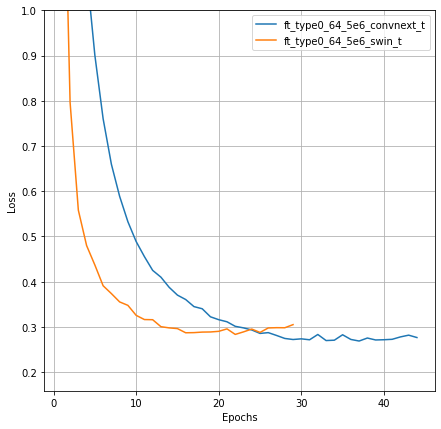

In [15]:
# Plotting loss:
for model in validation:
    if "5e6" not in model:
        continue
    df = validation[model]
    x = [idx + 1 for idx in range(len(df))]
    y = df["mean_loss"].to_list()
    plt.plot(x, y, label=model)

plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim(top=1)

fig = plt.gcf()
fig.set_size_inches(7, 7)
plt.show()

In [13]:
def getArrays(csv_predictions: str, csv_confusion: str):
    """Returns numpy arrays we can work with using scikit-learn"""
    df_pred = pd.read_csv(csv_predictions)
    df_conf = pd.read_csv(csv_confusion)

    true_y = df_pred["actual_idx"].to_numpy()
    pred_y = df_pred[df_conf.columns[1:]].to_numpy()

    # Rows gives actual, columns prediction
    conf = df_conf[df_conf.columns[1:]].to_numpy().T

    return true_y, pred_y, conf

In [14]:
for model in test:
    pred: str = test[model]
    conf: str = pred.replace("predictions.csv", "confusion.csv")
    if not os.path.exists(conf):
        continue # we need both, else we just skip it

    true_y, pred_y, _ = getArrays(pred, conf)
    pred_y_max = np.argmax(pred_y, axis=1)

    print("-" * 3 + model + "-" * 30)
    print(f"  Accuracy:          {mt.accuracy_score(true_y, pred_y_max)}")
    print(f"  Balanced Accuracy: {mt.balanced_accuracy_score(true_y, pred_y_max)}") 
    print(f"  Top 3 Accuracy:    {mt.top_k_accuracy_score(true_y, pred_y, k=3)}")
    print(f"  Top 5 Accuracy:    {mt.top_k_accuracy_score(true_y, pred_y, k=5)}")
    print("")

---ft_type0_64_5e6_swin_t------------------------------
  Accuracy:          0.9075025693730729
  Balanced Accuracy: 0.8864707326426914
  Top 3 Accuracy:    0.9917780061664954
  Top 5 Accuracy:    0.998972250770812

---ft_type0_64_5e6_convnext_t------------------------------
  Accuracy:          0.9177800616649537
  Balanced Accuracy: 0.8915647732052208
  Top 3 Accuracy:    0.9897225077081192
  Top 5 Accuracy:    0.9958890030832477

---ft_type0_64_1e5_convnext_t------------------------------
  Accuracy:          0.9146968139773896
  Balanced Accuracy: 0.8758816717175215
  Top 3 Accuracy:    0.9907502569373073
  Top 5 Accuracy:    0.9969167523124358

---ft_type0_64_1e5_swin_t------------------------------
  Accuracy:          0.9126413155190134
  Balanced Accuracy: 0.8961082503305555
  Top 3 Accuracy:    0.9907502569373073
  Top 5 Accuracy:    0.9969167523124358

---ft_type0_64_1e6_swin_t------------------------------
  Accuracy:          0.9054470709146968
  Balanced Accuracy: 0.867011